### Anamoly Detection:

It refers to the techinique of detecting the  abnormal transactions / defective products when labels are absent or unreliable.


### Steps used in this Algorithm:-

1.  Import all the necessary  Libraries

2.  Create Synthetic Dataset (Normal + Anomalies)

3.  Feature Scaling

4.  Isolation Forest

5.  Local Outlier Factor (LOF)

6.  One-Class SVM

7.  Visualization

8.  Compare Detected Anomalies

### Step 1:  Import all the necessary  Libraries

In [61]:
import numpy              as   np
import pandas             as   pd
import matplotlib.pyplot  as   plt
import seaborn            as   sns

from   sklearn.datasets        import  make_blobs
from   sklearn.model_selection import  train_test_split
from   sklearn.preprocessing   import  StandardScaler
from   sklearn.model_selection import  train_test_split
from   sklearn.ensemble        import  IsolationForest
from   sklearn.neighbors       import  LocalOutlierFactor
from   sklearn.svm             import  OneClassSVM

### Step 2: Create Synthetic Dataset (Normal + Anomalies)

In [62]:
# Generate normal data
X_normal, _ = make_blobs(
    n_samples=300,
    centers=[[0, 0]],
    cluster_std=0.6,
    random_state=42
)

# Generate anomalies (outliers)
rng = np.random.RandomState(42)
X_anomaly = rng.uniform(low=-6, high=6, size=(30, 2))

# Combine
X = np.vstack([X_normal, X_anomaly])

df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

In [63]:
df

,Feature_1,Feature_2
0,-0.714782,0.393932
1,-0.326630,0.066554
2,0.072177,0.308663
3,-0.588905,0.277262
4,0.034925,-0.685782
...,...,...
325,5.635016,3.301594
326,5.273987,4.737928
327,1.174800,5.062491
328,-4.938090,-3.648206


### Step 3:  Feature Scaling

In [64]:
sc = StandardScaler()

X_scaled = sc.fit_transform(df)

In [65]:
X_scaled

array([[-4.98682259e-01,  3.06991481e-01],
       [-1.83357328e-01,  4.15781037e-02],
       [ 1.40623081e-01,  2.37862049e-01],
       [-3.96423145e-01,  2.12404361e-01],
       [ 1.10360409e-01, -5.68357796e-01],
       [-1.09134996e-01, -7.24281552e-01],
       [ 4.28846475e-01, -5.59442336e-01],
       [-2.11298386e-01,  8.88632347e-01],
       [-3.12091399e-01, -2.56449987e-01],
       [-3.27312803e-01, -3.03943245e-01],
       [ 5.84522325e-01,  4.40627745e-01],
       [-2.10777855e-01, -1.54268098e-01],
       [ 4.86260531e-01, -1.08794938e+00],
       [ 2.46979451e-01, -2.14388478e-01],
       [ 2.43966000e-01, -3.76467555e-01],
       [ 4.67556287e-01, -4.54735202e-01],
       [ 9.91411973e-01,  2.18109960e-01],
       [ 8.83255009e-02,  6.94669730e-01],
       [-2.49472539e-01,  1.00597657e-01],
       [ 6.09893600e-01,  5.00226556e-01],
       [ 1.30405046e-01,  3.53121709e-01],
       [-9.11443445e-01, -5.02745663e-01],
       [-3.21439919e-02, -1.26270528e-01],
       [-2.

### Step 4: Isolation Forest

In [66]:
from   sklearn.ensemble  import IsolationForest


iso_forest = IsolationForest(
    n_estimators = 200        ,
    contamination = 0.1       ,
    random_state = 42
)



df["IF_Prediction"] = iso_forest.fit_predict(X_scaled)

df["IF_Anomaly"] = df["IF_Prediction"].map({1: 0, -1: 1})

In [67]:
df

,Feature_1,Feature_2,IF_Prediction,IF_Anomaly
0,-0.714782,0.393932,1,0
1,-0.326630,0.066554,1,0
2,0.072177,0.308663,1,0
3,-0.588905,0.277262,1,0
4,0.034925,-0.685782,1,0
...,...,...,...,...
325,5.635016,3.301594,-1,1
326,5.273987,4.737928,-1,1
327,1.174800,5.062491,-1,1
328,-4.938090,-3.648206,-1,1


### Step 5:  Local Outlier Factor (LOF)

In [68]:
LOF = LocalOutlierFactor(
    n_neighbors = 200   ,
    contamination = 0.1
)


df["LOF_Prediction"] = LOF.fit_predict(X_scaled)
df["LOF_Anomaly"] = df["LOF_Prediction"].map({1: 0, -1: 1})

In [69]:
df

,Feature_1,Feature_2,IF_Prediction,IF_Anomaly,LOF_Prediction,LOF_Anomaly
0,-0.714782,0.393932,1,0,1,0
1,-0.326630,0.066554,1,0,1,0
2,0.072177,0.308663,1,0,1,0
3,-0.588905,0.277262,1,0,1,0
4,0.034925,-0.685782,1,0,1,0
...,...,...,...,...,...,...
325,5.635016,3.301594,-1,1,-1,1
326,5.273987,4.737928,-1,1,-1,1
327,1.174800,5.062491,-1,1,-1,1
328,-4.938090,-3.648206,-1,1,-1,1


### Step 6:  One-Class SVM

In [70]:
ocsvm = OneClassSVM(
    kernel="rbf",
    nu=0.1,
    gamma="scale"
)

df["SVM_Prediction"] = ocsvm.fit_predict(X_scaled)
df["SVM_Anomaly"] = df["SVM_Prediction"].map({1: 0, -1: 1})


### Step 7: Visualization

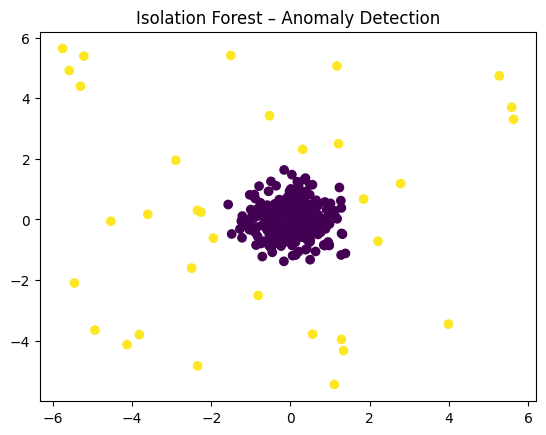

In [71]:
#### Isolation Forest Output

plt.figure()
plt.scatter(
    df["Feature_1"],
    df["Feature_2"],
    c=df["IF_Anomaly"]
)
plt.title("Isolation Forest – Anomaly Detection")
plt.show()


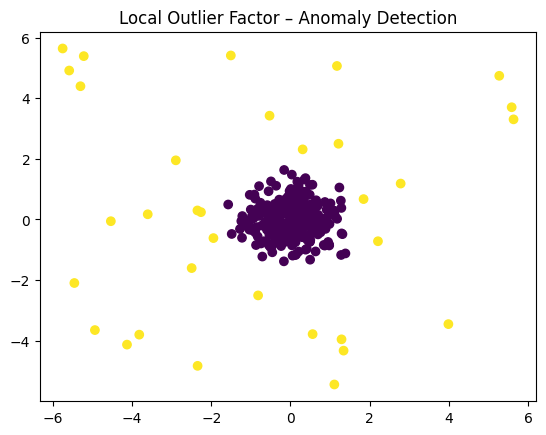

In [72]:
#### Local Outlier Factor Output


plt.figure()
plt.scatter(
    df["Feature_1"],
    df["Feature_2"],
    c=df["LOF_Anomaly"]
)
plt.title("Local Outlier Factor – Anomaly Detection")
plt.show()

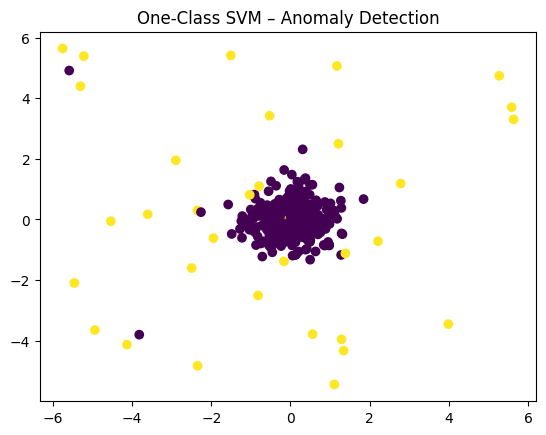

In [73]:
#### One-Class SVM Output

plt.figure()
plt.scatter(
    df["Feature_1"],
    df["Feature_2"],
    c=df["SVM_Anomaly"]
)
plt.title("One-Class SVM – Anomaly Detection")
plt.show()

### Step 8:  Compare Detected Anomalies

In [74]:
print("Isolation Forest anomalies:", df["IF_Anomaly"].sum())
print("LOF anomalies:", df["LOF_Anomaly"].sum())
print("One-Class SVM anomalies:", df["SVM_Anomaly"].sum())


Isolation Forest anomalies: 33
LOF anomalies: 33
One-Class SVM anomalies: 35
